In [60]:
import os
import sys
while not os.getcwd().endswith('ml'):
    os.chdir('..')
sys.path.insert(0, os.getcwd())

In [61]:
import kaggle_problems.rosneft_proppant.RPCC_metric_utils_for_participants as metrics
from kaggle_problems.rosneft_proppant.workspace.common import bins_dict
import pandas as pd
import numpy as np
import copy
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', 100)

In [62]:
COLORED_IMG_DIR = "kaggle_problems/rosneft_proppant/data/colored_main_area"

In [63]:
predicted = pd.read_csv("kaggle_problems/rosneft_proppant/workspace/answers.csv")
train = pd.read_csv("kaggle_problems/rosneft_proppant/workspace/data/labels/train.csv")

In [64]:
print(len(predicted.ImageId.unique()))

1


In [53]:
colored_img = [img[:-len(".jpg")] for img in os.listdir(COLORED_IMG_DIR) if img.endswith('.jpg')]

In [36]:
#train = train[np.logical_and(~train.prop_count.isnull(), ~train['16'].isnull())]

In [37]:
train[train.ImageId.isin(colored_img)].describe()

,ImageId,6,7,8,10,12,14,16,18,20,25,30,35,40,45,50,60,70,80,100,pan,prop_count
count,140.000000,140.0,140.0,140.0,140.0,140.0,140.0,140.000000,140.000000,140.000000,140.000000,140.000000,140.0,140.000000,140.0,140.0,140.0,140.0,140.0,140.0,140.0,3.000000
mean,365.857143,0.0,0.0,0.0,0.0,0.0,0.0,0.005181,0.057824,0.156891,0.356211,0.215671,0.0,0.170280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2442.333333
std,224.457157,0.0,0.0,0.0,0.0,0.0,0.0,0.001865,0.121420,0.190781,0.143069,0.090675,0.0,0.078468,0.0,0.0,0.0,0.0,0.0,0.0,0.0,297.785717
min,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.002591,0.004750,0.045265,0.032495,0.000985,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2102.000000
25%,179.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.003872,0.006541,0.072797,0.332936,0.248702,0.0,0.171779,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2336.000000
50%,340.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.004971,0.007371,0.083201,0.412562,0.253331,0.0,0.187983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2570.000000
75%,560.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.005882,0.008225,0.091234,0.442166,0.256574,0.0,0.211891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2612.500000
max,787.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.009592,0.364969,0.617816,0.556755,0.263734,0.0,0.270995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2655.000000


In [39]:
bins = ['6', '7', '8', '10', '12', '14', '16', '18', '20', '25', '30', '35', '40', '45', '50', '60', '70', '80', '100']
bins_mm = [
    3.35,
    2.8,
    2.36,
    2.,
    1.7,
    1.4,
    1.18,
    1.,
    0.85,
    0.71,
    0.6,
    0.5,
    0.425,
    0.355,
    0.3,
    0.25,
    0.212,
    0.18,
    0.15
]
bins_pixel = [b * 30 for b in bins_mm]
bins_dict = {key: value for key, value in zip(bins, bins_pixel)}
print(bins_dict)

{'6': 100.5, '7': 84.0, '8': 70.8, '10': 60.0, '12': 51.0, '14': 42.0, '16': 35.4, '18': 30.0, '20': 25.5, '25': 21.299999999999997, '30': 18.0, '35': 15.0, '40': 12.75, '45': 10.649999999999999, '50': 9.0, '60': 7.5, '70': 6.359999999999999, '80': 5.3999999999999995, '100': 4.5}


In [34]:
#print([str(i) + ".jpg"  for i in train[np.logical_and(~train.prop_count.isnull(), ~train['16'].isnull())]['ImageId'].to_numpy()])

In [65]:
train = train[train.ImageId == 8]
predicted = predicted[predicted.ImageId == 8]

In [55]:
print(train)

   ImageId    6    7    8   10   12   14      16      18     20      25  \
7        8  0.0  0.0  0.0  0.0  0.0  0.0  0.0205  0.3859  0.561  0.0263   

       30   35   40   45   50   60   70   80  100  pan  prop_count fraction  
7  0.0064  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0         NaN    16/20  


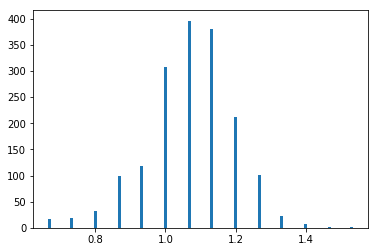

In [56]:
plt.hist(predicted.prop_size.values, bins=100)
plt.show()

In [57]:
print(len(predicted))

1713


In [38]:
train[~train.prop_count.isnull()]

,ImageId,6,7,8,10,12,14,16,18,20,...,40,45,50,60,70,80,100,pan,prop_count,fraction
5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1800.0,NaN
30,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1054.0,NaN
40,41,0.0,0.0,0.0,0.0,0.0,0.0,0.021200,0.480300,0.455700,...,0.000200,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,2835.0,16/20
41,42,0.0,0.0,0.0,0.0,0.0,0.0,0.007000,0.383500,0.576400,...,0.000700,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,3029.0,16/20
46,47,0.0,0.0,0.0,0.0,0.0,0.0,0.014800,0.479400,0.477400,...,0.000100,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,2744.0,16/20
52,53,0.0,0.0,0.0,0.0,0.0,0.0,0.008375,0.346959,0.607378,...,0.000199,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,2102.0,16/20
68,69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2400.0,NaN
70,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,688.0,NaN
72,73,0.0,0.0,0.0,0.0,0.0,0.0,0.011800,0.435300,0.523000,...,0.000300,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,2609.0,16/20
99,100,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.024000,...,0.013200,0.0,0.0008,0.0,0.0,0.0,0.0,0.0,2787.0,20/40


In [39]:
# best_mi_c = []
# for img in [ 41,  42,  47,  73, 100, 112, 151, 152, 179, 191, 214, 215, 227, 237, 308, 348, 416, 424, 440, 492, 496, 524, 553, 592, 616, 655, 714]:

#     print(img)
#     predicted = pd.read_csv("kaggle_problems/rosneft_proppant/workspace/answers.csv")
#     train = pd.read_csv("kaggle_problems/rosneft_proppant/workspace/data/labels/labels.csv")

#     train = train[train.ImageId == img]
#     predicted = predicted[predicted.ImageId == img]

#     mi = 10
#     mi_c = -1
#     for c in np.arange(0.5, 1., 0.01):
#         _predicted = copy.deepcopy(predicted)
#         _predicted['prop_size'] *= c;
#         res = metrics.contest_metric(train, _predicted)
#         if (mi > res[0]):
#             mi = res[0]
#             mi_c = c;
#     best_mi_c.append(mi_c)

In [40]:
# print(np.mean(best_mi_c))

In [69]:
predicted.prop_size *= 0.78
metrics.contest_metric(train, predicted)

[0.0 0.0 0.0 0.0 0.0 0.0 0.0205 0.3859 0.561 0.0263 0.0064 0.0 0.0 0.0 0.0
 0.0 0.0 0.0 0.0 0.0]
[0.0 0.0 0.0 0.0 0.0 0.0005837711617046118 0.017513134851138354
 0.404553415061296 0.4798598949211909 0.07647402218330414
 0.021015761821366025 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]


(nan, 0.01960089799022565, nan)

In [333]:
# Для 714 картинки - 0.72 коеффицент
# Для 41 картинки - 0.78 
# Для 592 картинки - 0.82